## Tic-Tac-Toe game
Tic-Tac-Toe is a simple, turn-based board game played on a 3×3 grid by two players, traditionally labeled X and O. Two players take turns placing their marks into empty squares. The goal is to be the first to get three of your marks in a row—vertically, horizontally, or diagonally. If all squares are filled and neither player has three in a row, the game is a draw.

<div align="center">
    <img src="https://github.com/Michigan-State-University-CSE-440/Minimax/blob/main/assets/rule.png?raw=1" alt="Description" width="600" height="200">
</div>

As we learnt in the class, Minimax is a classic algorithm used to make decisions in two-player, turn-based games—like Tic-Tac-Toe, Connect Four, or Chess. By simulating all possible moves and assuming each player tries to optimize their own outcome, minimax can find the move that maximizes the AI’s chances of winning (or at least forces a draw).

In this lab, we will use minimax algorithm to create a simple AI player for the tic-tac-toe game. This AI will look ahead at every possible move it can make, consider every response the opponent could give, and then choose the move that guarantees the best final result for itself.

Before creating a game AI, we will first introduce the specific game settings for this implementation. Then, we will learn how to apply the MINIMAX algorithm to this game scenario.

### Represent the Game States
1. Board State: We use a simple 3×3 board, often stored as a list or array of 9 cells. Each cell can be:
- ‘X’ for the AI’s move,
- ‘O’ for the human player’s move,
- None (or empty) for an unoccupied cell.
2.	Turns: We alternate between the AI (X) and the human (O).

### Terminal Conditions
A terminal state is a board configuration where:
1. Either player (human or AI) has formed three in a row: horizontal, vertical, or diagonal,
2. or the board is completely filled which results in a draw.

At the end of each round, i.e., after achieving terminal condition, we give each outcome a score from the perspective of the AI:
- +1 if X (the AI) has won,
- -1 if O (the human) has won,
- 0 if it’s a draw or no further moves remain.

### Recap the MINIMAX Tree
<div align="center">
    <img src="https://github.com/Michigan-State-University-CSE-440/Minimax/blob/main/assets/minimax_tree.png?raw=1" alt="Description" width="700" height="450">
</div>

This minimax tree shows how the Tic-Tac-Toe game progresses through alternating turns between two players—MAX (X) and MIN (O). Each node in the tree is a snapshot of the game board at a given turn, while each branch represents a possible move. Here’s how it applies the minimax algorithm:
1.	MAX (X) levels: On X’s (AI's) turn, the algorithm explores all possible moves for X. Then it selects the move that yields the highest utility—because X is trying to maximize the outcome in its favor.

2.	MIN (O) levels: On O’s (human's) turn, the algorithm similarly explores all possible O moves, but selects the move that leads to the lowest utility—because O is trying to minimize X’s chances of winning.

3.	Bottom-Up Evaluation: The values (+1, −1, 0) from the terminal positions propagate up the tree:
- At MIN levels, the chosen value is the minimum of the child nodes.
- At MAX levels, it’s the maximum of the child nodes.

Through this process, each branch of the game tree is evaluated, and each player’s optimal strategy is determined at every step, ensuring that AI picks the best move (if one exists) and human counters with the best defense.

### Example of MINIMAX Tree Construction
Next, we need to construct a MINIMAX tree on our own, and then find out the optimal strategy for AI. To avoid constructing and reasoning through an overly complex MINIMAX tree, we will intervene in the game at a specific state and simulate the AI’s moves to ensure victory (or at least not losing).

Here is an example of the way to use MINIMAX for a partial board. You need to learn from it and finish the following practice.

**Initial State**:
<div align="center">
    <img src="https://github.com/Michigan-State-University-CSE-440/Minimax/blob/main/assets/example_1.png?raw=1" alt="Description" width="100" height="100">
</div>

**Top to Bottom**: First, we need to construct the MINIMAX tree from top to bottom. Specifically, we need to list all possible subsequent states based on the current state and repeat this process until achieve the terminal condition. In this example, both X and O have three pieces in the initial state, so the AI will make the first move. The letter on the left of each state corresponds to that specific state, which can be helpful for us to represent a certain state in our subsequent calculations.
<div align="center">
    <img src="https://github.com/Michigan-State-University-CSE-440/Minimax/blob/main/assets/example_2.png?raw=1" alt="Description" width="750" height="450">
</div>

**Bottom to Top**: Second, we need to calculate the value of each state (node) from bottom to top based on the MINIMAX calculation method.  
Depth = 2:  
State E: V = MAX(+1) = +1  
State F: V = MAX(0) = 0  
State G: V = MAX(+1) = +1  
State H: V = MAX(0) = 0

Depth = 1:  
State B: V = MIN(Value of E, Value of F) = MIN(+1, 0) = 0  
State C: V = MIN(Value of G, Value of H) = MIN(+1, 0) = 0  
State D: V = Min(+1) = +1  

Depth = 0:  
State A: V = Max(Value of B, Value of C, Value of D) = Max(0, 0, +1) = +1

Therefore, in the initial state, the AI’s optimal strategy is to place its mark on the **bottom-right corner** of the board, which will lead to victory.

## Task 1: Construct MINIMAX Tree Manually

In this task, you should manually construct a MINIMAX tree for the given partial game board, just like in the example above, to determine the optimal move for X.

**Note**: You cannot provide the result only; the **calculation process** following the above example must be included to get full credit. Only the **Botton to Top** calculation should be provided, the Top to Bottom process can be finished on your draft paper.

**Initial State**:
<div align="center">
    <img src="https://github.com/Michigan-State-University-CSE-440/Minimax/blob/main/assets/practice_1.png?raw=1" alt="Description" width="100" height="100">
</div>

**Answer**:
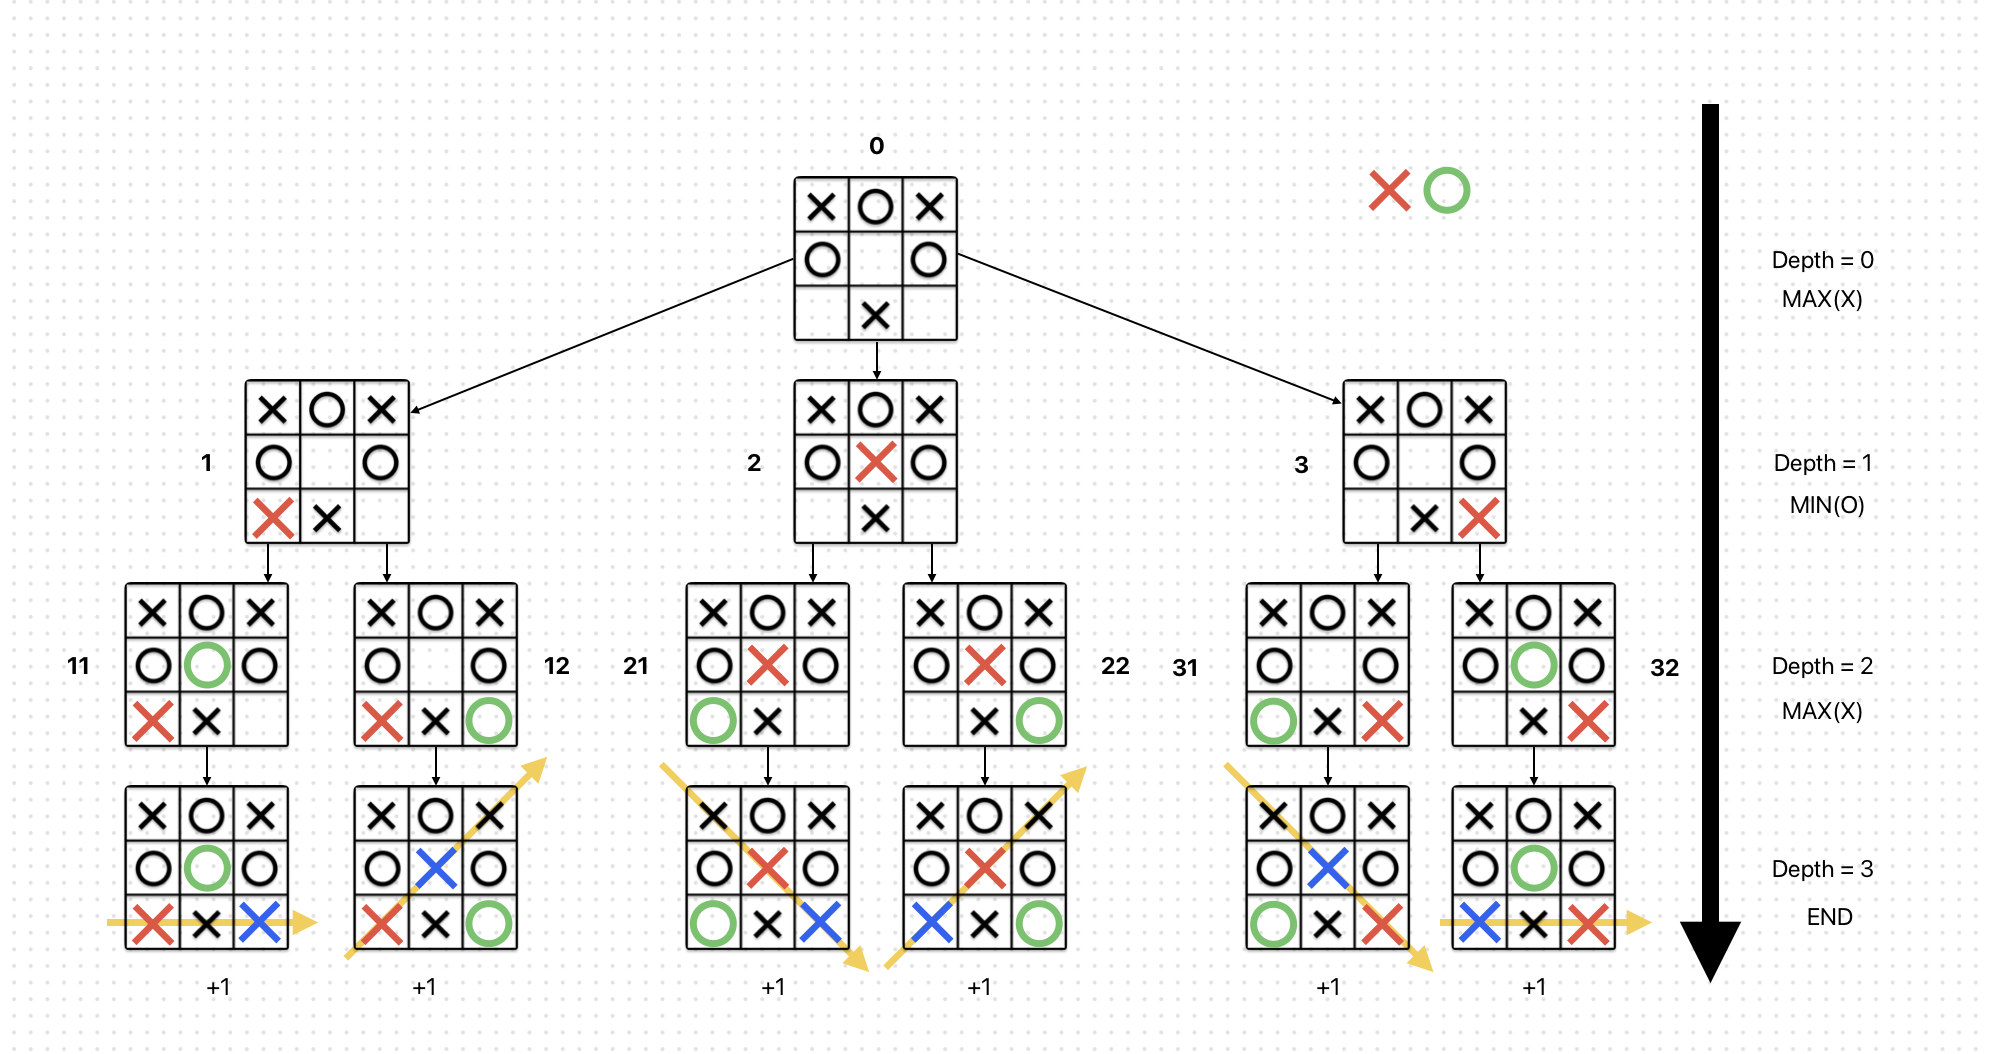
*NOTE*: Red X's are the AI action leading to depth 1 whereas the Bue X's are the AI actions leading to the goal states (in this case).


**Bottom to Top**:
Depth = 2:
State 11: V = MAX(+1) = +1
State 12: V = MAX(+1) = +1
State 21: V = MAX(+1) = +1
State 22: V = MAX(+1) = +1
State 31: V = MAX(+1) = +1
State 32: V = MAX(+1) = +1

Depth = 1:
State 1: V = MIN(Value of 11, Value of 12) = MIN(+1, +1) = +1
State 2: V = MIN(Value of 21, Value of 22) = MIN(+1, +1) = +1
State 3: V = MIN(Value of 31, Value of 32) = MIN(+1, +1) = +1

Depth = 0:
State 0: V = Max(Value of 1, Value of 2, Value of 3) = Max(+1, +1, +1) = +1

Since a goal states end with a score of +1, the +1 propogates up through all depths. This means that the AI has a guaranteed victory if it reaches state 0.

## Task 2: Complete MINMAX Algorithm and Enojoy Game

In this task, you need to programmatically complete the key steps within the *value*, *max_value*, and *min_value* functions of the MINIMAX algorithm. **You only need to complete the sections marked with TODO**, as the rest of the code is complete and correct. This slide will be a helpful reference as you work through the task.

<div align="center">
    <img src="https://github.com/Michigan-State-University-CSE-440/Minimax/blob/main/assets/framework.png?raw=1" alt="Description" width="930" height="450">
</div>


In [4]:
# Some utility functions for Tic-Tac-Toe
# No need to modify this code

import math

def print_board(board):
    """
    Prints a 3x3 Tic-Tac-Toe board.

    If a cell is empty (None), we print its index (0-8).
    Otherwise, we print the player's symbol ('X' or 'O').
    """
    print("------------- Current Board -------------")
    for i in range(9):
        cell = board[i]
        if cell is None:
            # Show the cell index if empty
            print(i, end=" ")
        else:
            # Show 'X' or 'O'
            print(cell, end=" ")

        # After every 3 cells, move to the next line
        if i % 3 == 2:
            print()
    print("-----------------------------------------")
    print()


def check_winner(board):
    """
    Checks if there is a winner on the board.
    Returns 'X' if X wins, 'O' if O wins, or None if no winner yet.
    """
    # Possible winning lines (3 rows, 3 cols, 2 diagonals)
    winning_positions = [
        (0,1,2), (3,4,5), (6,7,8),  # Rows
        (0,3,6), (1,4,7), (2,5,8),  # Cols
        (0,4,8), (2,4,6)            # Diagonals
    ]

    for (a, b, c) in winning_positions:
        if board[a] is not None and board[a] == board[b] == board[c]:
            return board[a]  # 'X' or 'O'

    return None  # No winner

def is_draw(board):
    """Checks if the board is full and there is no winner."""
    return all(cell is not None for cell in board) and check_winner(board) is None

def find_best_move(board):
    """
    Finds the best move for 'X' (the AI).
    Returns the index (0-8) where 'X' should move
    such that it maximizes its final outcome (score).
    """
    best_score = -math.inf
    best_move = -1

    # Try placing 'X' in each empty cell to see which move is best.
    for i in range(9):
        if board[i] is None:
            board[i] = 'X'  # Simulate X's move in cell i

            # After X moves, it's O's turn (MIN player),
            # so we call value(...) with is_maximizing=False.
            move_score = value(board, is_maximizing=False)

            # Undo the move
            board[i] = None

            # Keep track of the best (maximum) score among all possible moves
            if move_score > best_score:
                best_score = move_score
                best_move = i

    return best_move

### Subtask 2.1
In this subtask, you need to complete the *value* function. When *is_maximizing* is equal to *True*, the next agent is MAX (AI), and when it is equal to *False*, the next agent is MIN (human). You should call the appropriate function that looks for the minimum score (min_value) or maximum score (max_value).

In [ ]:
import math

def value(board, is_maximizing):
    """
    This function decides which part of the minimax process to apply.
    - If the board is in a terminal state (win, loss, or draw), we return a utility score.
    - Otherwise, it calls either max_value (if it's X's turn) or min_value (if it's O's turn).

    Parameters:
    board: list
        A list of 9 elements representing the Tic-Tac-Toe board.
        Each element can be 'X', 'O', or None (empty).
    is_maximizing: bool
        True if it's the 'X' (AI) player's turn, False if it's the 'O' (human) player's turn.

    Returns:
    int
        The score from X's perspective: +1 for X win, -1 for O win, 0 for draw (when terminal).
        If not terminal, the score is the maximum or minimum returned by the children nodes.
    """

    # 1. Check terminal conditions (win, loss, or draw).
    winner = check_winner(board)
    if winner == 'X':
        # If X has won, we return +1.
        return +1
    elif winner == 'O':
        # If O has won, we return -1.
        return -1
    elif is_draw(board):
        # If the board is full and no winner, it's a draw, so we return 0.
        return 0

    # 2. Not a terminal state, so we need to explore deeper.
    if is_maximizing:
        ############################TODO################################
        max_value;
        ############################TODO################################
    else:
        ############################TODO################################
        min_value;
        ############################TODO################################

### Subtask 2.2
In this subtask, you need to complete the *max_value* and *min_value* functions. Specifically, as shown in the slide, you need to call the value function during each iteration of the loop to ultimately obtain the maximum or minimum value at current state. Make sure to correctly set the *is_maximizing* variable to properly recurse into the subsequent calls of the *max_value* or *min_value* functions.

In [2]:
def max_value(board):
    """
    This function computes the best possible move for X (the 'max' player).
    It returns the maximum score that X can achieve among all possible moves.

    Parameters:
    board: list
        The current Tic-Tac-Toe board.

    Returns:
    int
        The highest minimax score X can force from this position.
    """

    # Start with the worst possible score for the maximizer (negative infinity).
    v = -math.inf

    # Check all possible moves to find the successor of current board state.
    for i in range(9):
        if board[i] is None: # If the cell is empty, we can make a move.
            # Temporarily put 'X' in cell i
            board[i] = 'X'
            ############################TODO################################
            if(check_winner == None & v<0)
                v=0;


            return(max_value(board));
            #############################END################################

            # Undo the move (backtrack) to restore the board state.
            board[i] = None


    # Return the maximum score found.
    return v

In [3]:
def min_value(board):
    """
    This function computes the best possible move for O (the 'min' player),
    from X's perspective. O tries to minimize X's score.

    Parameters:
    board: list
        The current Tic-Tac-Toe board.

    Returns:
    int
        The lowest minimax score X gets if O plays optimally.
    """

    # Start with the best possible score for O from X's perspective (positive infinity).
    # We want to force X's score down.
    v = math.inf

    # Check all possible moves to find the successor of current board state.
    for i in range(9):
        if board[i] is None: # If the cell is empty, we can make a move.
            # Temporarily put 'O' in cell i.
            board[i] = 'O'
            ############################TODO################################
            return(min_value(board));
            #############################END################################
            # Undo the move (backtrack).
            board[i] = None

    # Return the minimum score found.
    return v

### Run the Program
to see if you can beat the AI you creat.

In [ ]:
# ------------------------------------------------------------
# 3. Main Game Loop
# ------------------------------------------------------------
"""
Lets a human ('O') play against an AI ('X') using minimax.
The AI (X) goes first.
"""
board = [None] * 9  # 3x3 empty board

######################### TODO #########################
current_player = 'X'  # Start with AI (X)
# try to switch the order
########################################################

while True:
    print_board(board)
    winner = check_winner(board)
    if winner is not None:
        print(f"Game over! Winner: {winner}")
        break
    if is_draw(board):
        print("Game over! It's a draw.")
        break

    if current_player == 'X':
        # AI Move
        print("AI (X) is thinking...\n")
        move = find_best_move(board)
        board[move] = 'X'
        current_player = 'O'
    else:
        # Human Move
        valid_moves = [i for i in range(9) if board[i] is None]
        print(f"Human (O), choose your move from {valid_moves}.")
        try:
            human_move = int(input("Enter a position (0-8): "))
        except ValueError:
            print("Please enter a valid number!")
            continue

        if human_move not in valid_moves:
            print("Invalid move. Try again.")
            continue

        board[human_move] = 'O'
        current_player = 'X'